# Student Exam Scores:

### Problem Statement :- 
#### * What factors (features) affect test scores most?
#### * Are there interacting features which affect test scores?

In [1]:
# import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.describe(include = object)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours
count,30641,28801,28796,30641,28811,29451,30010,29737,27507,29686
unique,2,5,6,2,2,4,3,2,2,3
top,female,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10
freq,15424,9212,6633,19905,18856,16844,15213,19082,16145,16246


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [8]:
#Drop Unnamed Column
df = df.drop(['Unnamed: 0'] ,axis=1)

In [9]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [10]:
df.EthnicGroup.unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [11]:
df.EthnicGroup.value_counts()

group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: EthnicGroup, dtype: int64

In [12]:
df[df['EthnicGroup'].isna()]

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
32,male,NaN,some college,standard,none,married,sometimes,no,2.0,private,5 - 10,40,42,38
47,male,NaN,associate's degree,free/reduced,completed,married,regularly,no,2.0,private,< 5,76,68,68
50,female,NaN,some high school,free/reduced,completed,married,regularly,yes,NaN,private,> 10,75,86,90
88,female,NaN,some college,standard,completed,married,never,yes,0.0,school_bus,< 5,59,69,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30499,female,NaN,associate's degree,free/reduced,completed,married,regularly,no,1.0,school_bus,5 - 10,60,78,71
30513,male,NaN,some high school,free/reduced,none,divorced,sometimes,no,2.0,NaN,5 - 10,50,48,46
30578,male,NaN,some high school,standard,none,married,sometimes,no,1.0,private,5 - 10,80,82,74
30625,female,NaN,some high school,free/reduced,completed,single,sometimes,no,3.0,private,5 - 10,47,65,68


In [13]:
# fill the nan Values with new category is "Unknown"

In [14]:
df['EthnicGroup'].fillna("Unknown", inplace=True)

In [15]:
df.EthnicGroup.value_counts()

group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Unknown    1840
Name: EthnicGroup, dtype: int64

In [16]:
df.isnull().sum()

Gender                    0
EthnicGroup               0
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [17]:
df[df['ParentEduc'].isna()]

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
22,male,group D,NaN,standard,none,married,never,yes,5.0,NaN,5 - 10,42,53,51
24,male,group D,NaN,free/reduced,completed,married,sometimes,yes,2.0,school_bus,5 - 10,74,71,80
54,male,group D,NaN,standard,completed,married,regularly,no,1.0,private,> 10,61,60,60
70,male,group A,NaN,standard,completed,NaN,regularly,yes,NaN,NaN,5 - 10,82,79,83
98,male,group E,NaN,standard,completed,single,sometimes,yes,0.0,school_bus,5 - 10,66,63,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30593,female,group C,NaN,standard,none,married,sometimes,no,2.0,school_bus,< 5,79,85,90
30598,male,group E,NaN,standard,completed,divorced,sometimes,no,3.0,private,5 - 10,86,83,76
30610,female,group B,NaN,standard,completed,married,regularly,no,4.0,private,5 - 10,74,84,84
30623,female,group B,NaN,standard,completed,married,regularly,no,2.0,NaN,5 - 10,75,87,87


In [18]:
df['ParentEduc'].fillna("Uneducated", inplace=True)

In [19]:
unique = df.TestPrep.unique()
value = df.TestPrep.value_counts()
print(unique ,"\n", value)

['none' nan 'completed'] 
 none         18856
completed     9955
Name: TestPrep, dtype: int64


In [20]:
df['TestPrep'].fillna('none', inplace=True)

In [21]:
unique = df.TestPrep.unique()
value = df.TestPrep.value_counts()
print(unique ,"\n", value)

['none' 'completed'] 
 none         20686
completed     9955
Name: TestPrep, dtype: int64


In [22]:
par_unique = df.ParentMaritalStatus.unique()
par_value = df.ParentMaritalStatus.value_counts()
print(par_unique ,"\n", par_value)

['married' 'single' 'widowed' nan 'divorced'] 
 married     16844
single       7097
divorced     4919
widowed       591
Name: ParentMaritalStatus, dtype: int64


In [23]:
df["ParentMaritalStatus"].fillna('Unknown', inplace = True)

In [24]:
df.isnull().sum()

Gender                    0
EthnicGroup               0
ParentEduc                0
LunchType                 0
TestPrep                  0
ParentMaritalStatus       0
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [25]:
df.WklyStudyHours.unique()

array(['< 5', '5 - 10', '> 10', nan], dtype=object)

In [26]:
df.TransportMeans.unique()

array(['school_bus', nan, 'private'], dtype=object)

### According To Gender 

In [27]:
df.Gender.value_counts()

female    15424
male      15217
Name: Gender, dtype: int64

In [28]:
df.groupby('Gender').agg({'MathScore':'mean',"ReadingScore":"mean","WritingScore":'mean'})

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.080654,72.853216,72.856457
male,69.069856,65.854571,63.920418


1. The distribution of male and female students in the dataset is fairly balanced.
2. Score wise girls performed better that boys in ReadingScore andwritingScore, whereas boys scored better in MathScore.


In [29]:
df.groupby('WklyStudyHours').agg({'MathScore':'mean',"ReadingScore":"mean","WritingScore":'mean'})

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


Text(0.5, 1.0, 'How Long do student study at home [Hrs]')

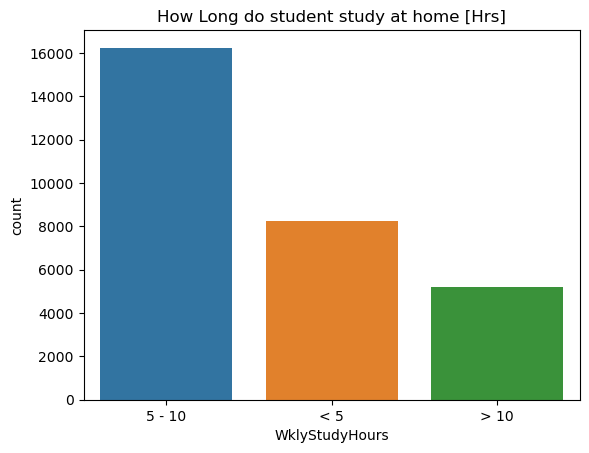

In [30]:
sns.countplot(data=df,x='WklyStudyHours',order=['5 - 10', '< 5', '> 10'])
plt.title("How Long do student study at home [Hrs]")

#### Weekly study hours¶
1. This feature is a weekly study hours the students had been studying after school. There are three distinct values less that 5hrs a week, between 5 -10hrs per week and more than 10hrs per week.
2. More than half (56%) of the students study between 5 - 10 hrs. However, only 17% used more than 10 hrs weekly study hours.
3. Test score result shows that performance is direclty related to the hours spent studying.

### TestPrep

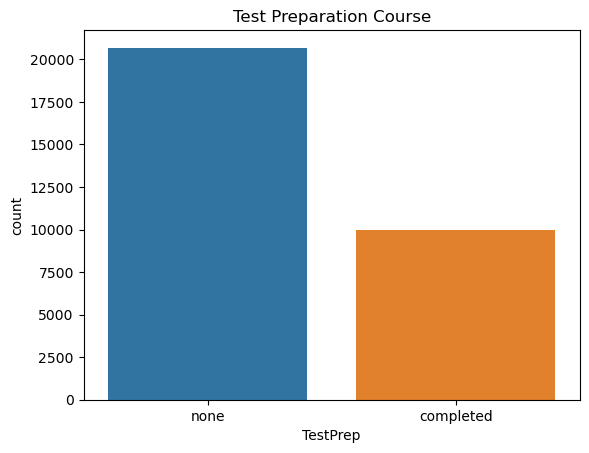

In [31]:
sns.countplot(data=df, x="TestPrep")
ax = plt.title("Test Preparation Course")
plt.show()

In [32]:
df.groupby('TestPrep').agg({'MathScore':'mean',"ReadingScore":"mean","WritingScore":'mean'})

,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.546660,73.732998,74.703265
none,65.120323,67.281495,65.394180


#### Test Prep
1. Logically this features had also a positive impact on test score; reading test inparticular was hight affected by test preparation course.


### Practice Sport

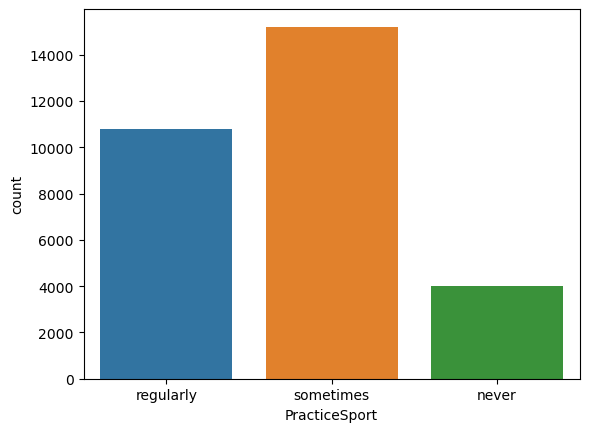

In [33]:
sns.countplot(data=df, x='PracticeSport')
plt.show()

In [34]:
df.groupby('PracticeSport').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


Here in this comparsion we not get any thing important student well played daily or never not too much difference in their score

### Travel 

In [35]:
df.groupby('TransportMeans').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

,MathScore,ReadingScore,WritingScore
TransportMeans,,,
private,66.511354,69.472364,68.509593
school_bus,66.674636,69.446206,68.492351


1. No effect on test scores

In [36]:
df.groupby(['LunchType']).agg(
    {'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}
)

,MathScore,ReadingScore,WritingScore
LunchType,,,
free/reduced,58.862332,64.189735,62.650522
standard,70.709370,72.175634,71.529716


In lunch Type we see who eat good quality of food perform better.

## Gender Distribution

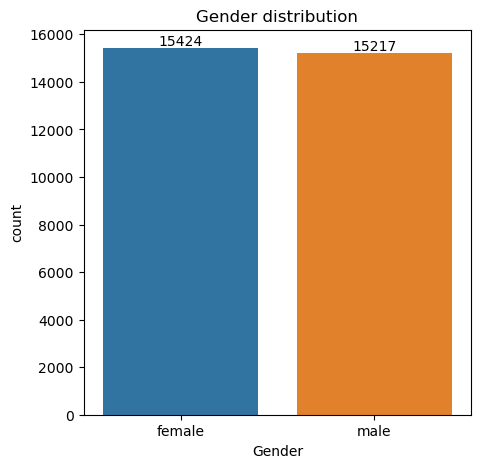

In [37]:
# Gender Distribution
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df,x='Gender')
ax.bar_label(ax.containers[0])
plt.title("Gender distribution")
plt.show()

In [38]:
gb = df.groupby('ParentEduc').agg({'MathScore':'mean',"ReadingScore":"mean","WritingScore":'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
Uneducated,66.645528,69.225474,68.295935
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


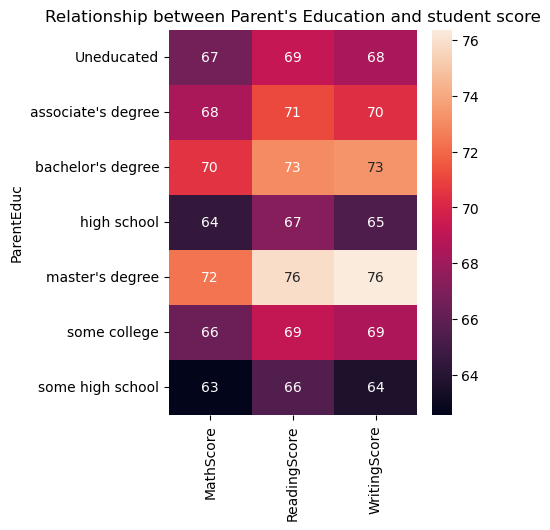

In [39]:
plt.figure(figsize=(4,5))
sns.heatmap(gb, annot=True)
plt.title("Relationship between Parent's Education and student score")
plt.show()

In [40]:
#from the above chart we have concluded that the education of the parents have a good impact on their score

In [41]:
gb1 = df.groupby('ParentMaritalStatus').agg({'MathScore':'mean',"ReadingScore":"mean","WritingScore":'mean'})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
Unknown,66.548739,69.237815,68.196639
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


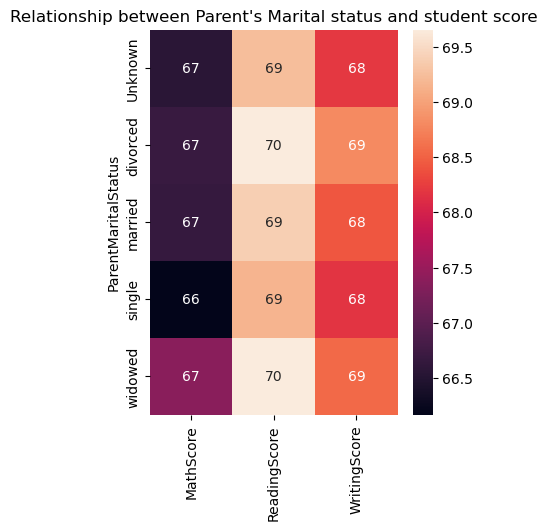

In [42]:
plt.figure(figsize=(4,5))
sns.heatmap(gb1, annot=True)
plt.title("Relationship between Parent's Marital status and student score")
plt.show()

In [43]:
#from the above chart we have concluded that there is no impact
#on the student score due to their marital status

# Interacting Features

In [44]:
df.groupby(['Gender','ParentEduc']).agg(
    {'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}
).style.background_gradient(cmap="Blues")

In this scenario we see male/female parent who's education master degree their student very well in exam
but in male we who's parent eduction is some high school their student less perform

In [45]:
df.groupby(['Gender','PracticeSport']).agg(
    {'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}
).style.background_gradient(cmap="Blues")

1. For male if they play regularly they will have  good score in maths only.
2. For Female if they play or not they score less in maths but in other subject they very well.

In [46]:
df.groupby(['TestPrep','WklyStudyHours']).agg(
    {'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}
).style.background_gradient(cmap="Blues")

* It shows student will completed TestPrep and study less than 10Hrs perform good in all exams

# Thank You!